## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [21]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [22]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,724.04000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,614.18352,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,536.85000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,690.33000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,681.70000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


In [23]:
# Split dataset
from sklearn.model_selection import train_test_split

copy_dataset = dataset.copy()

X = copy_dataset.drop(columns = ["Diagnosis"])
y = copy_dataset["Diagnosis"]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, 
                                                    y, 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((366, 22), (158, 22), (366,), (158,))

### Input feature analysis

Lets see how our data looks now after we split it

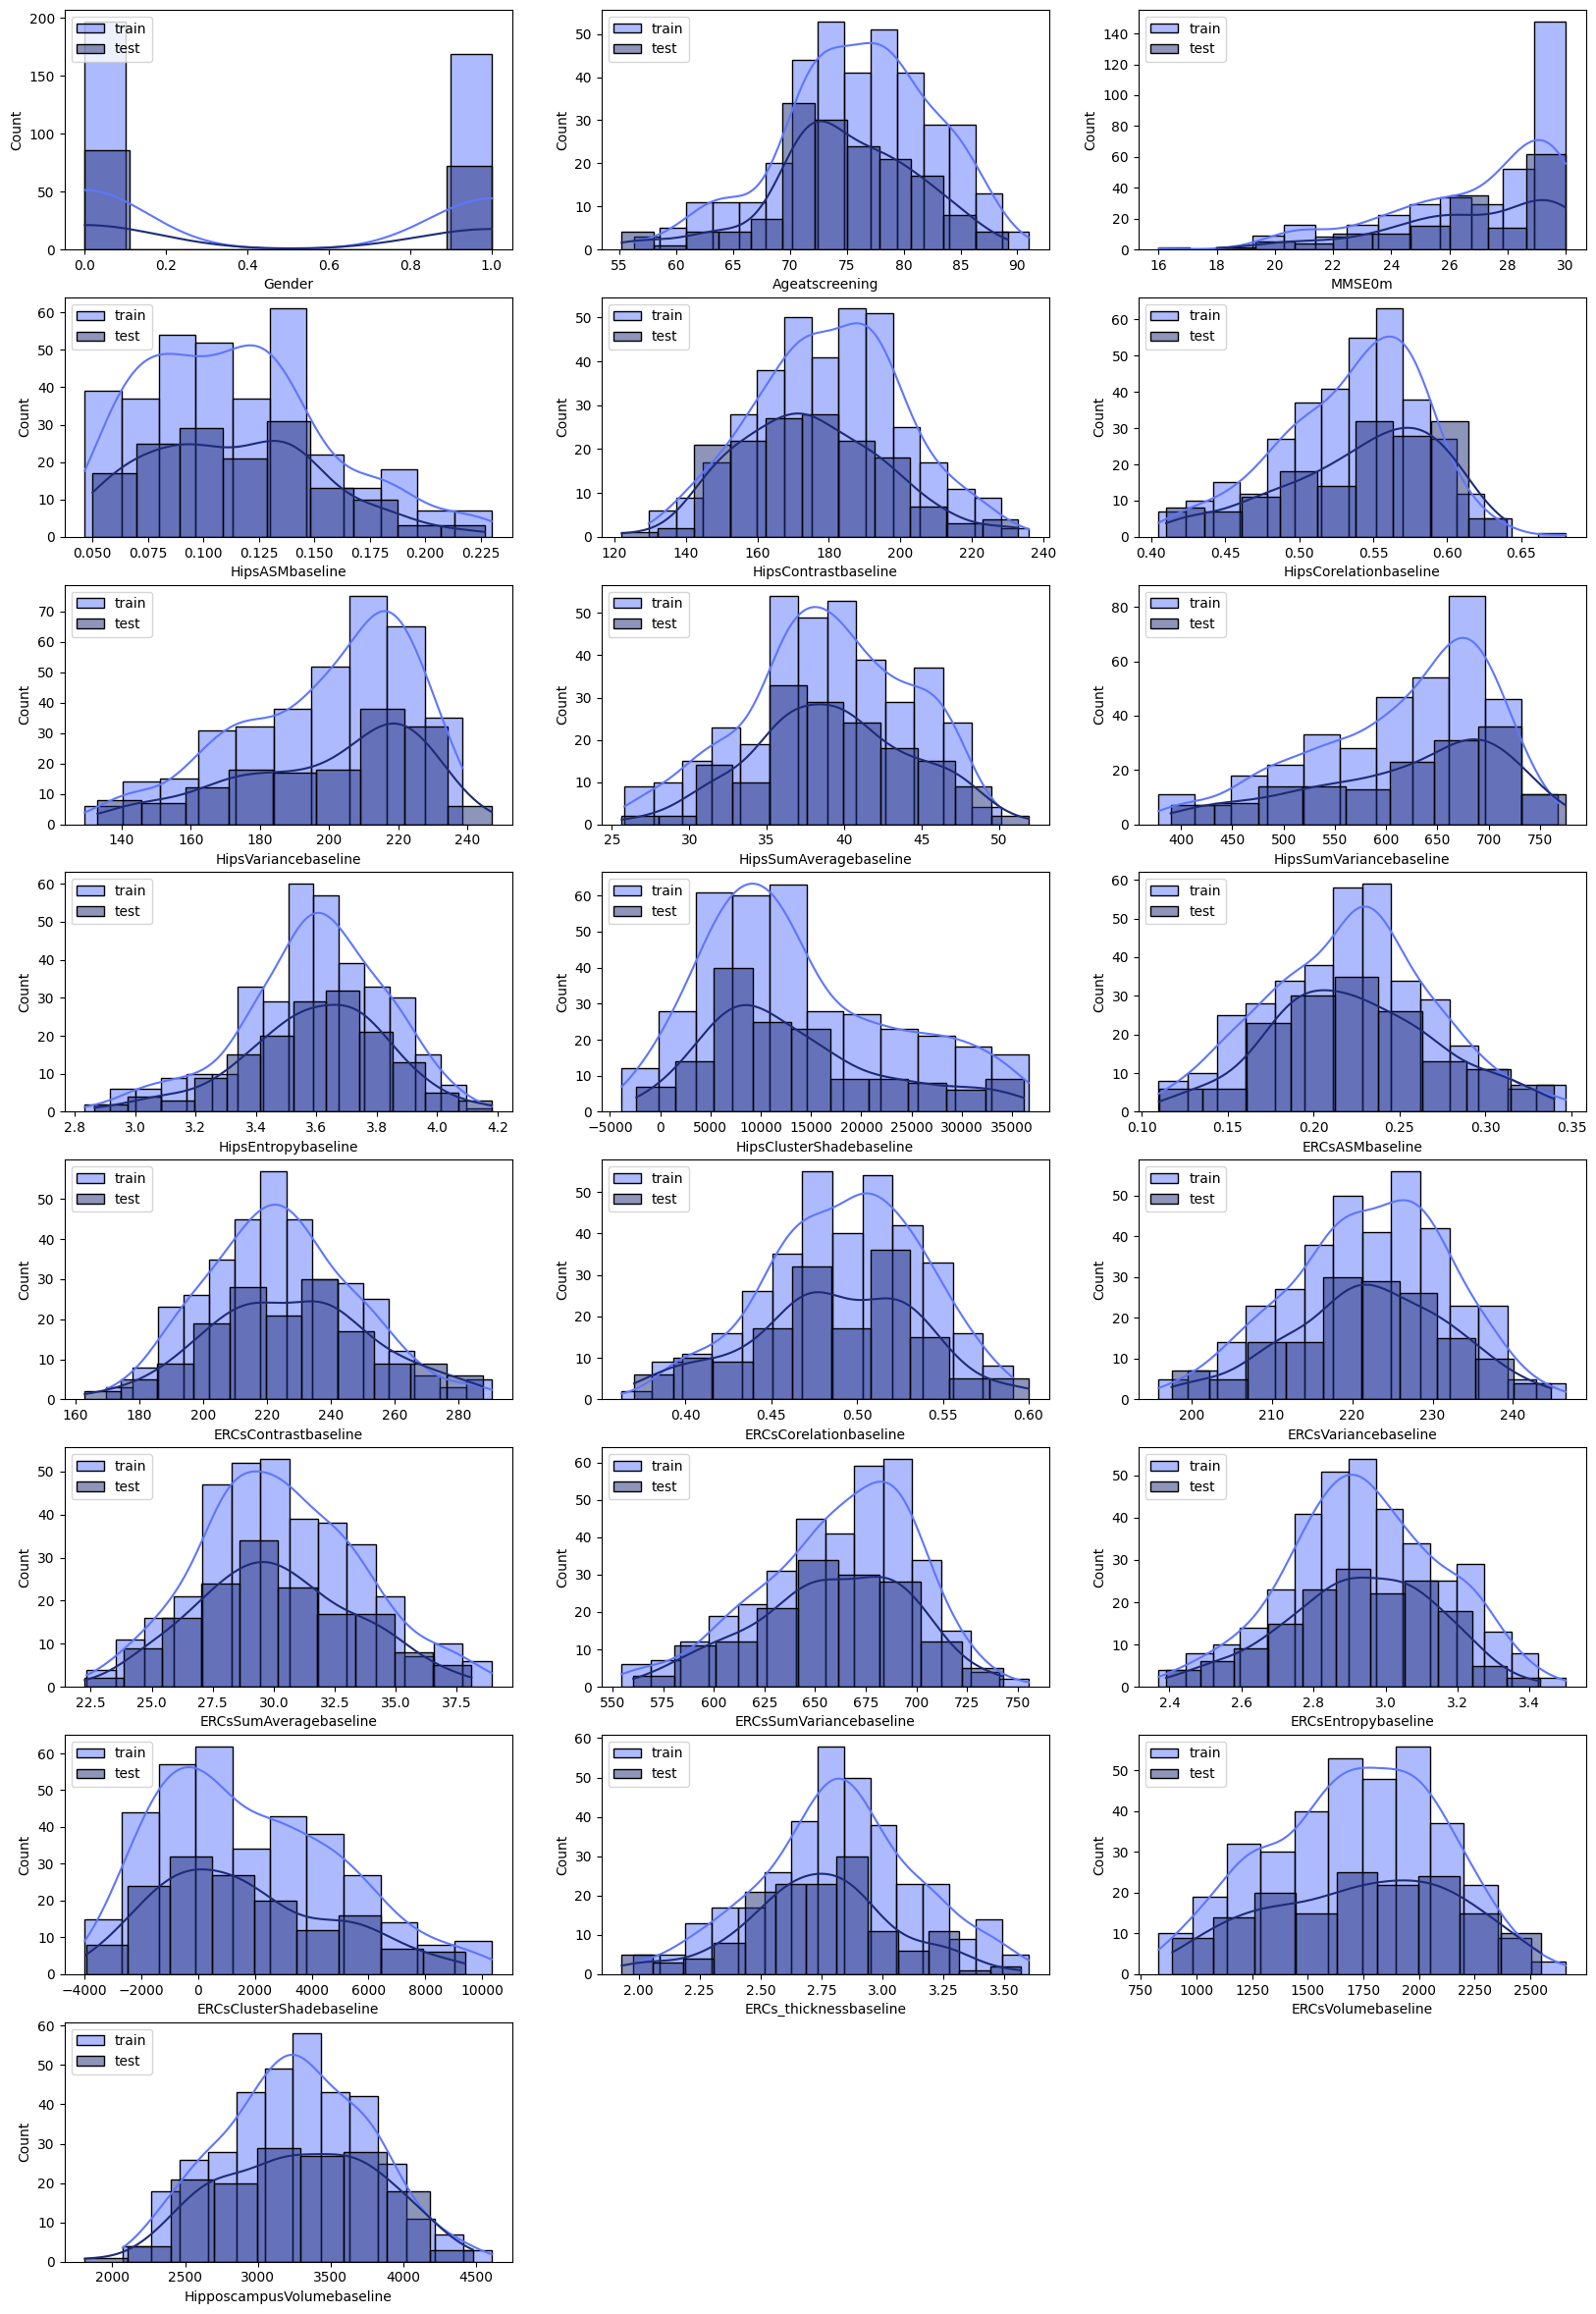

In [24]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis[X_train_vis.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis[X_test_vis.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

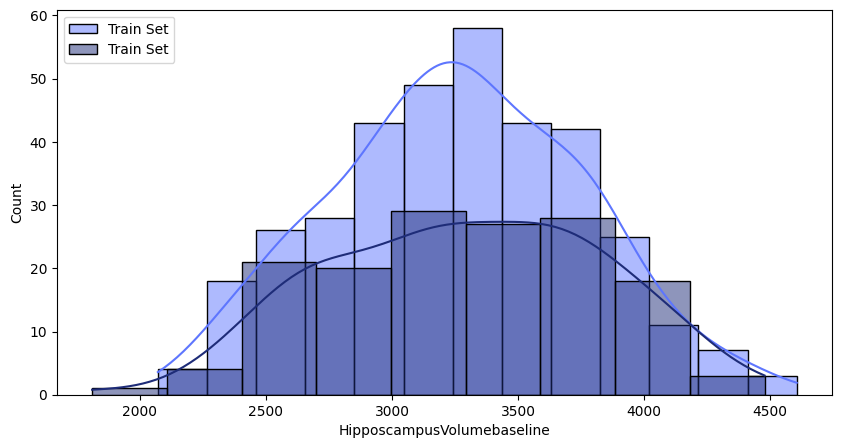

In [25]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train_vis["HipposcampusVolumebaseline"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test_vis["HipposcampusVolumebaseline"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

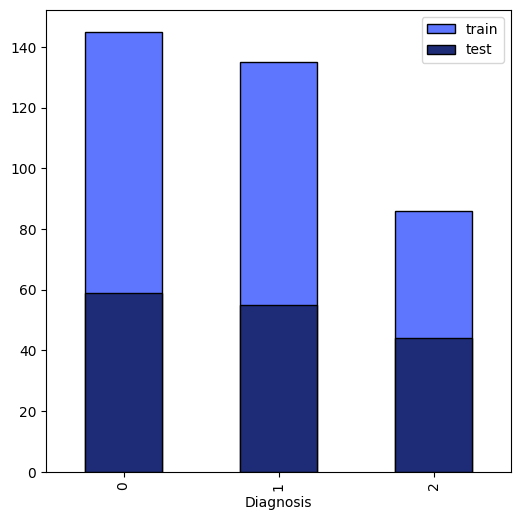

In [26]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

In [27]:
y_train_vis.value_counts()

Diagnosis
1    145
0    135
2     86
Name: count, dtype: int64

In [28]:
y_test_vis.value_counts()

Diagnosis
0    59
1    55
2    44
Name: count, dtype: int64

### Removing null values

In [29]:
null_dataset = dataset.dropna()

In [30]:
X_train_vis_null, X_test_vis_null, y_train_vis_null, y_test_vis_null = train_test_split(null_dataset.drop(columns=["Diagnosis"]), 
                                                    null_dataset["Diagnosis"], 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis_null.shape, X_test_vis_null.shape, y_train_vis_null.shape, y_test_vis_null.shape

((270, 22), (116, 22), (270,), (116,))

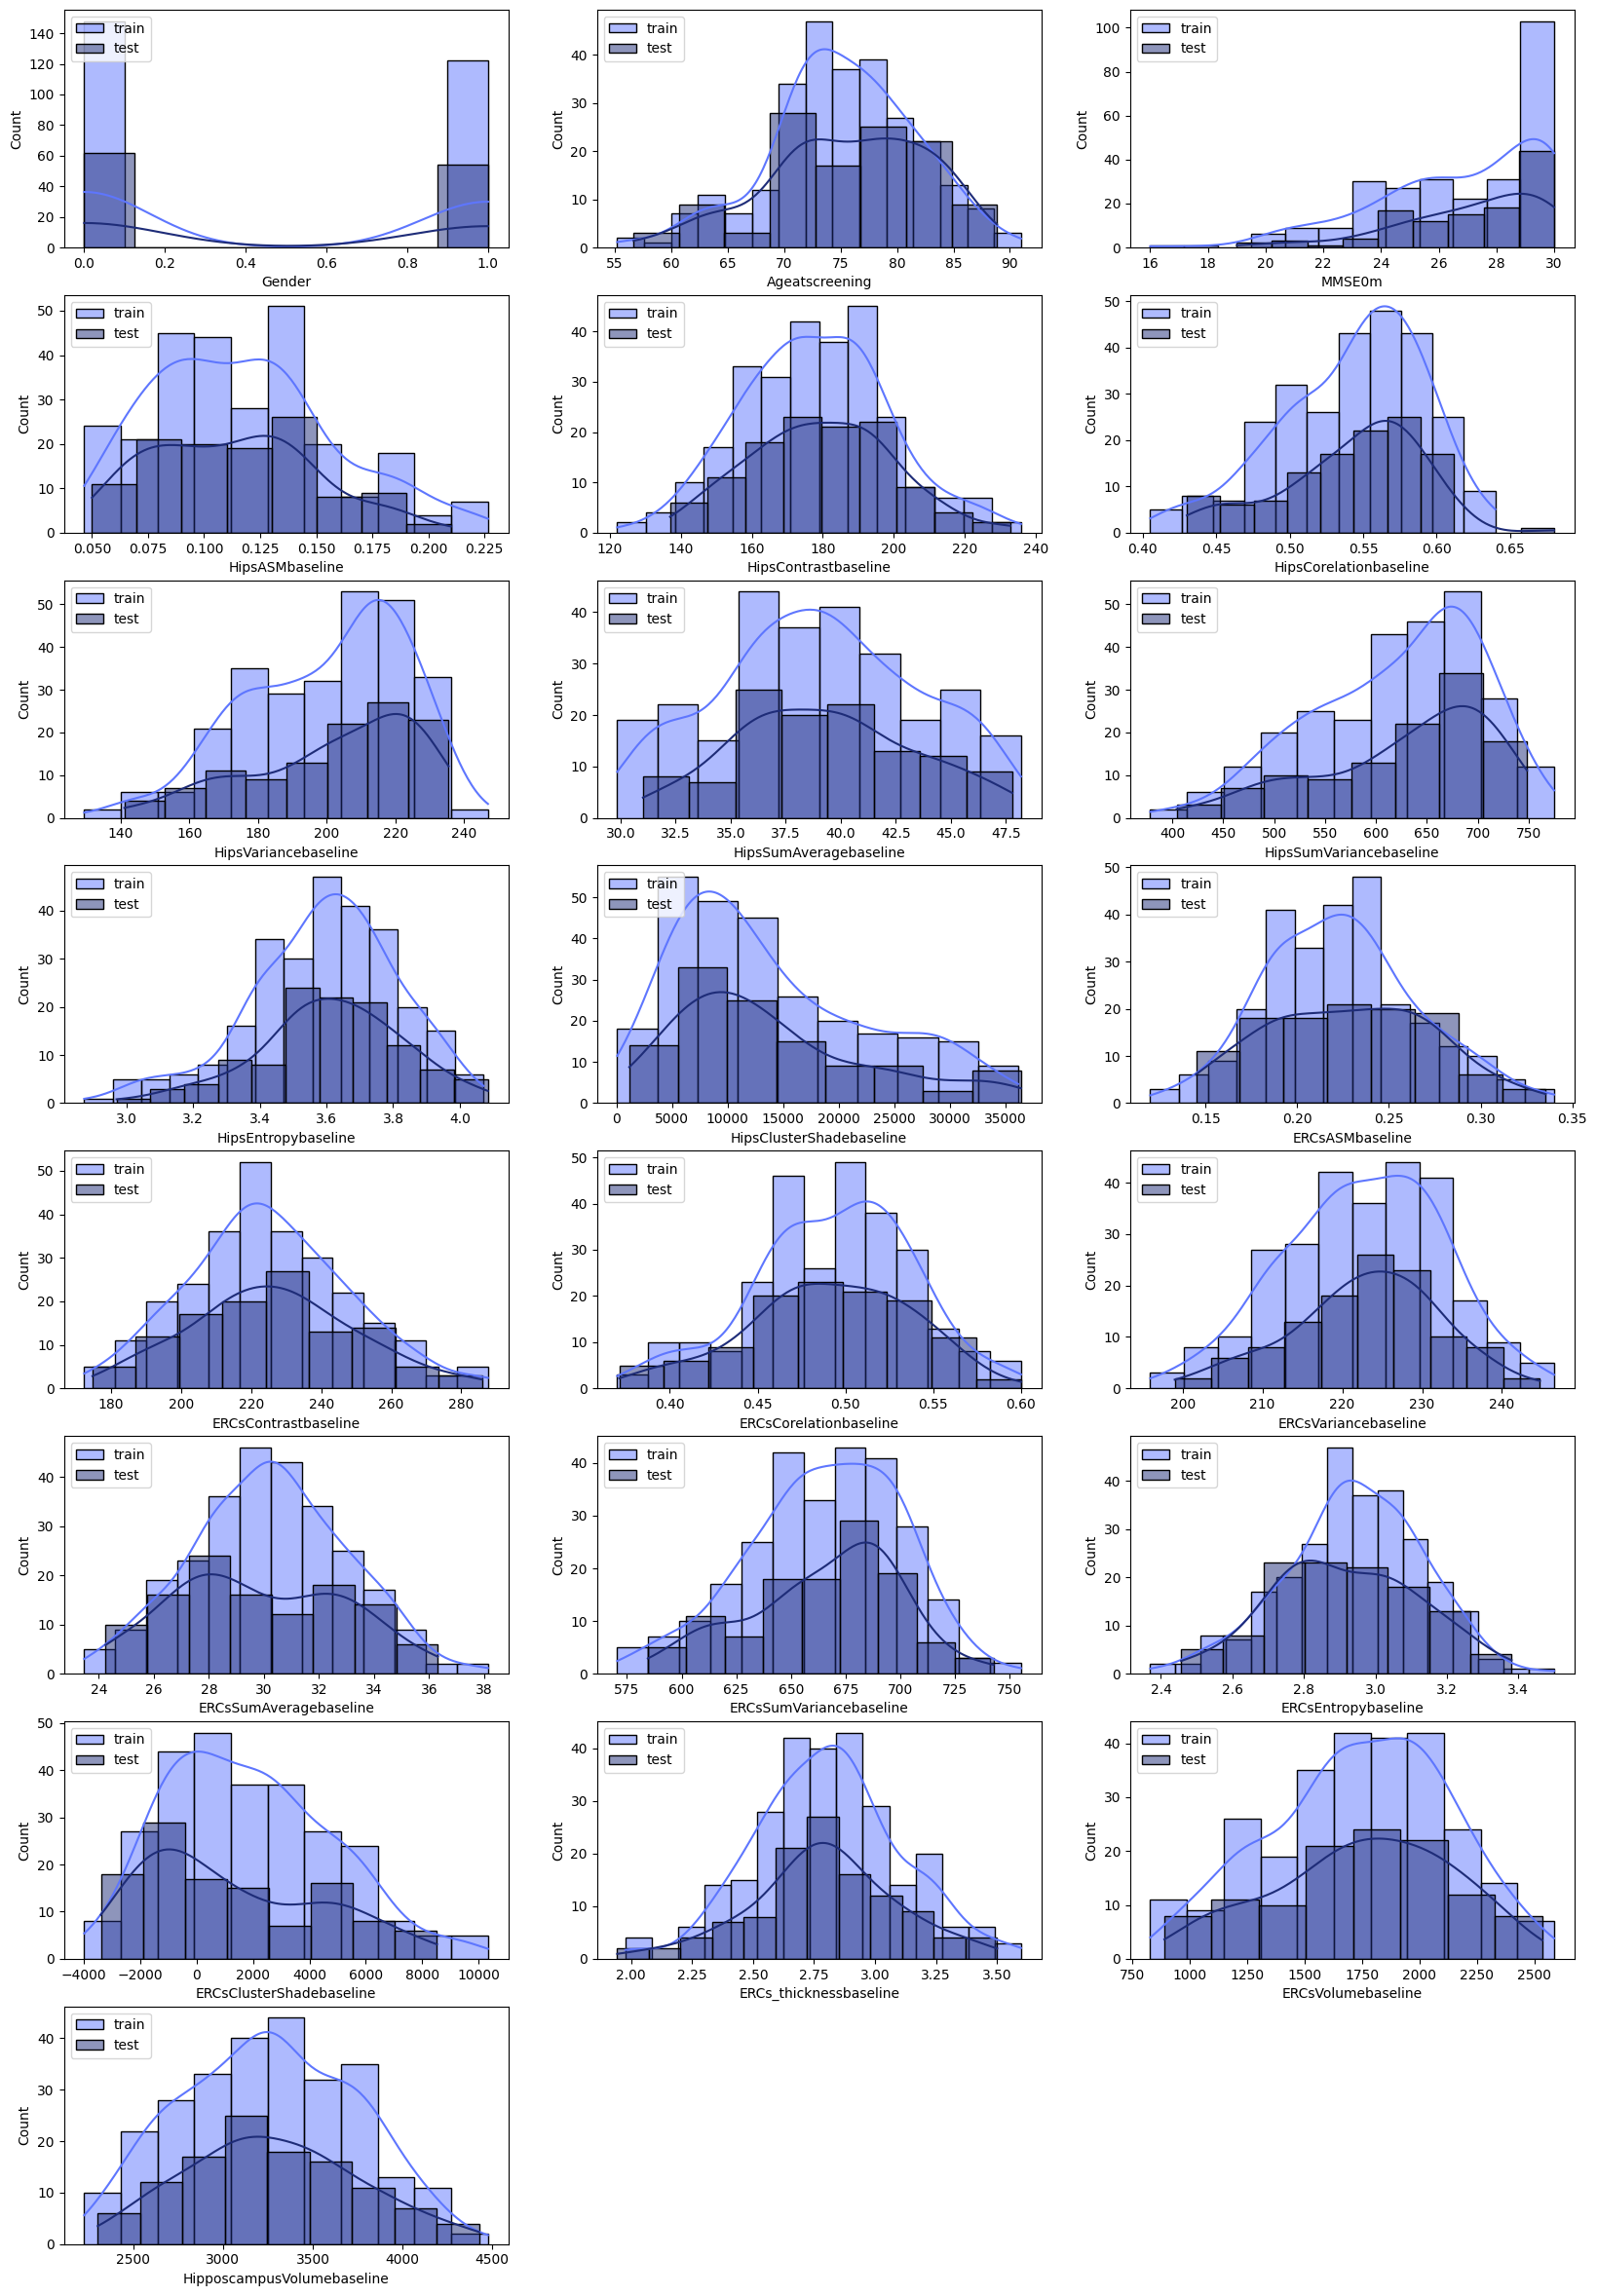

In [31]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis_null.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis_null[X_train_vis_null.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis_null[X_test_vis_null.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [32]:
y_train_vis_null.value_counts()

Diagnosis
1    107
0     90
2     73
Name: count, dtype: int64

In [33]:
y_test_vis_null.value_counts()

Diagnosis
1    55
0    40
2    21
Name: count, dtype: int64

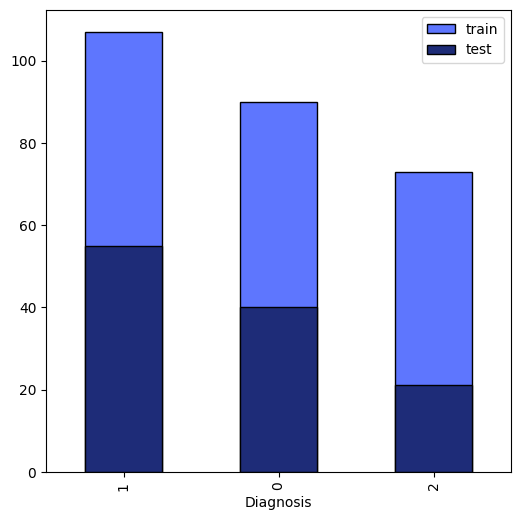

In [34]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis_null.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis_null.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

### Group Seperation with Train-Test Split Analysis

In [35]:
group_zero = dataset[dataset["Diagnosis"]==0]
group_two = dataset[dataset["Diagnosis"]==2]
group_three = dataset[dataset["Diagnosis"]==3]

combined_group_one = pd.concat([group_zero, group_three])
combined_group_two = pd.concat([group_zero, group_two])

In [36]:
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(combined_group_one.drop(columns = ["Diagnosis"]),
                                                                    combined_group_one["Diagnosis"],
                                                                    test_size = .30, 
                                                                    random_state = 42,
)

X_train_one.shape, X_test_one.shape, y_train_one.shape, y_test_one.shape

((135, 22), (59, 22), (135,), (59,))

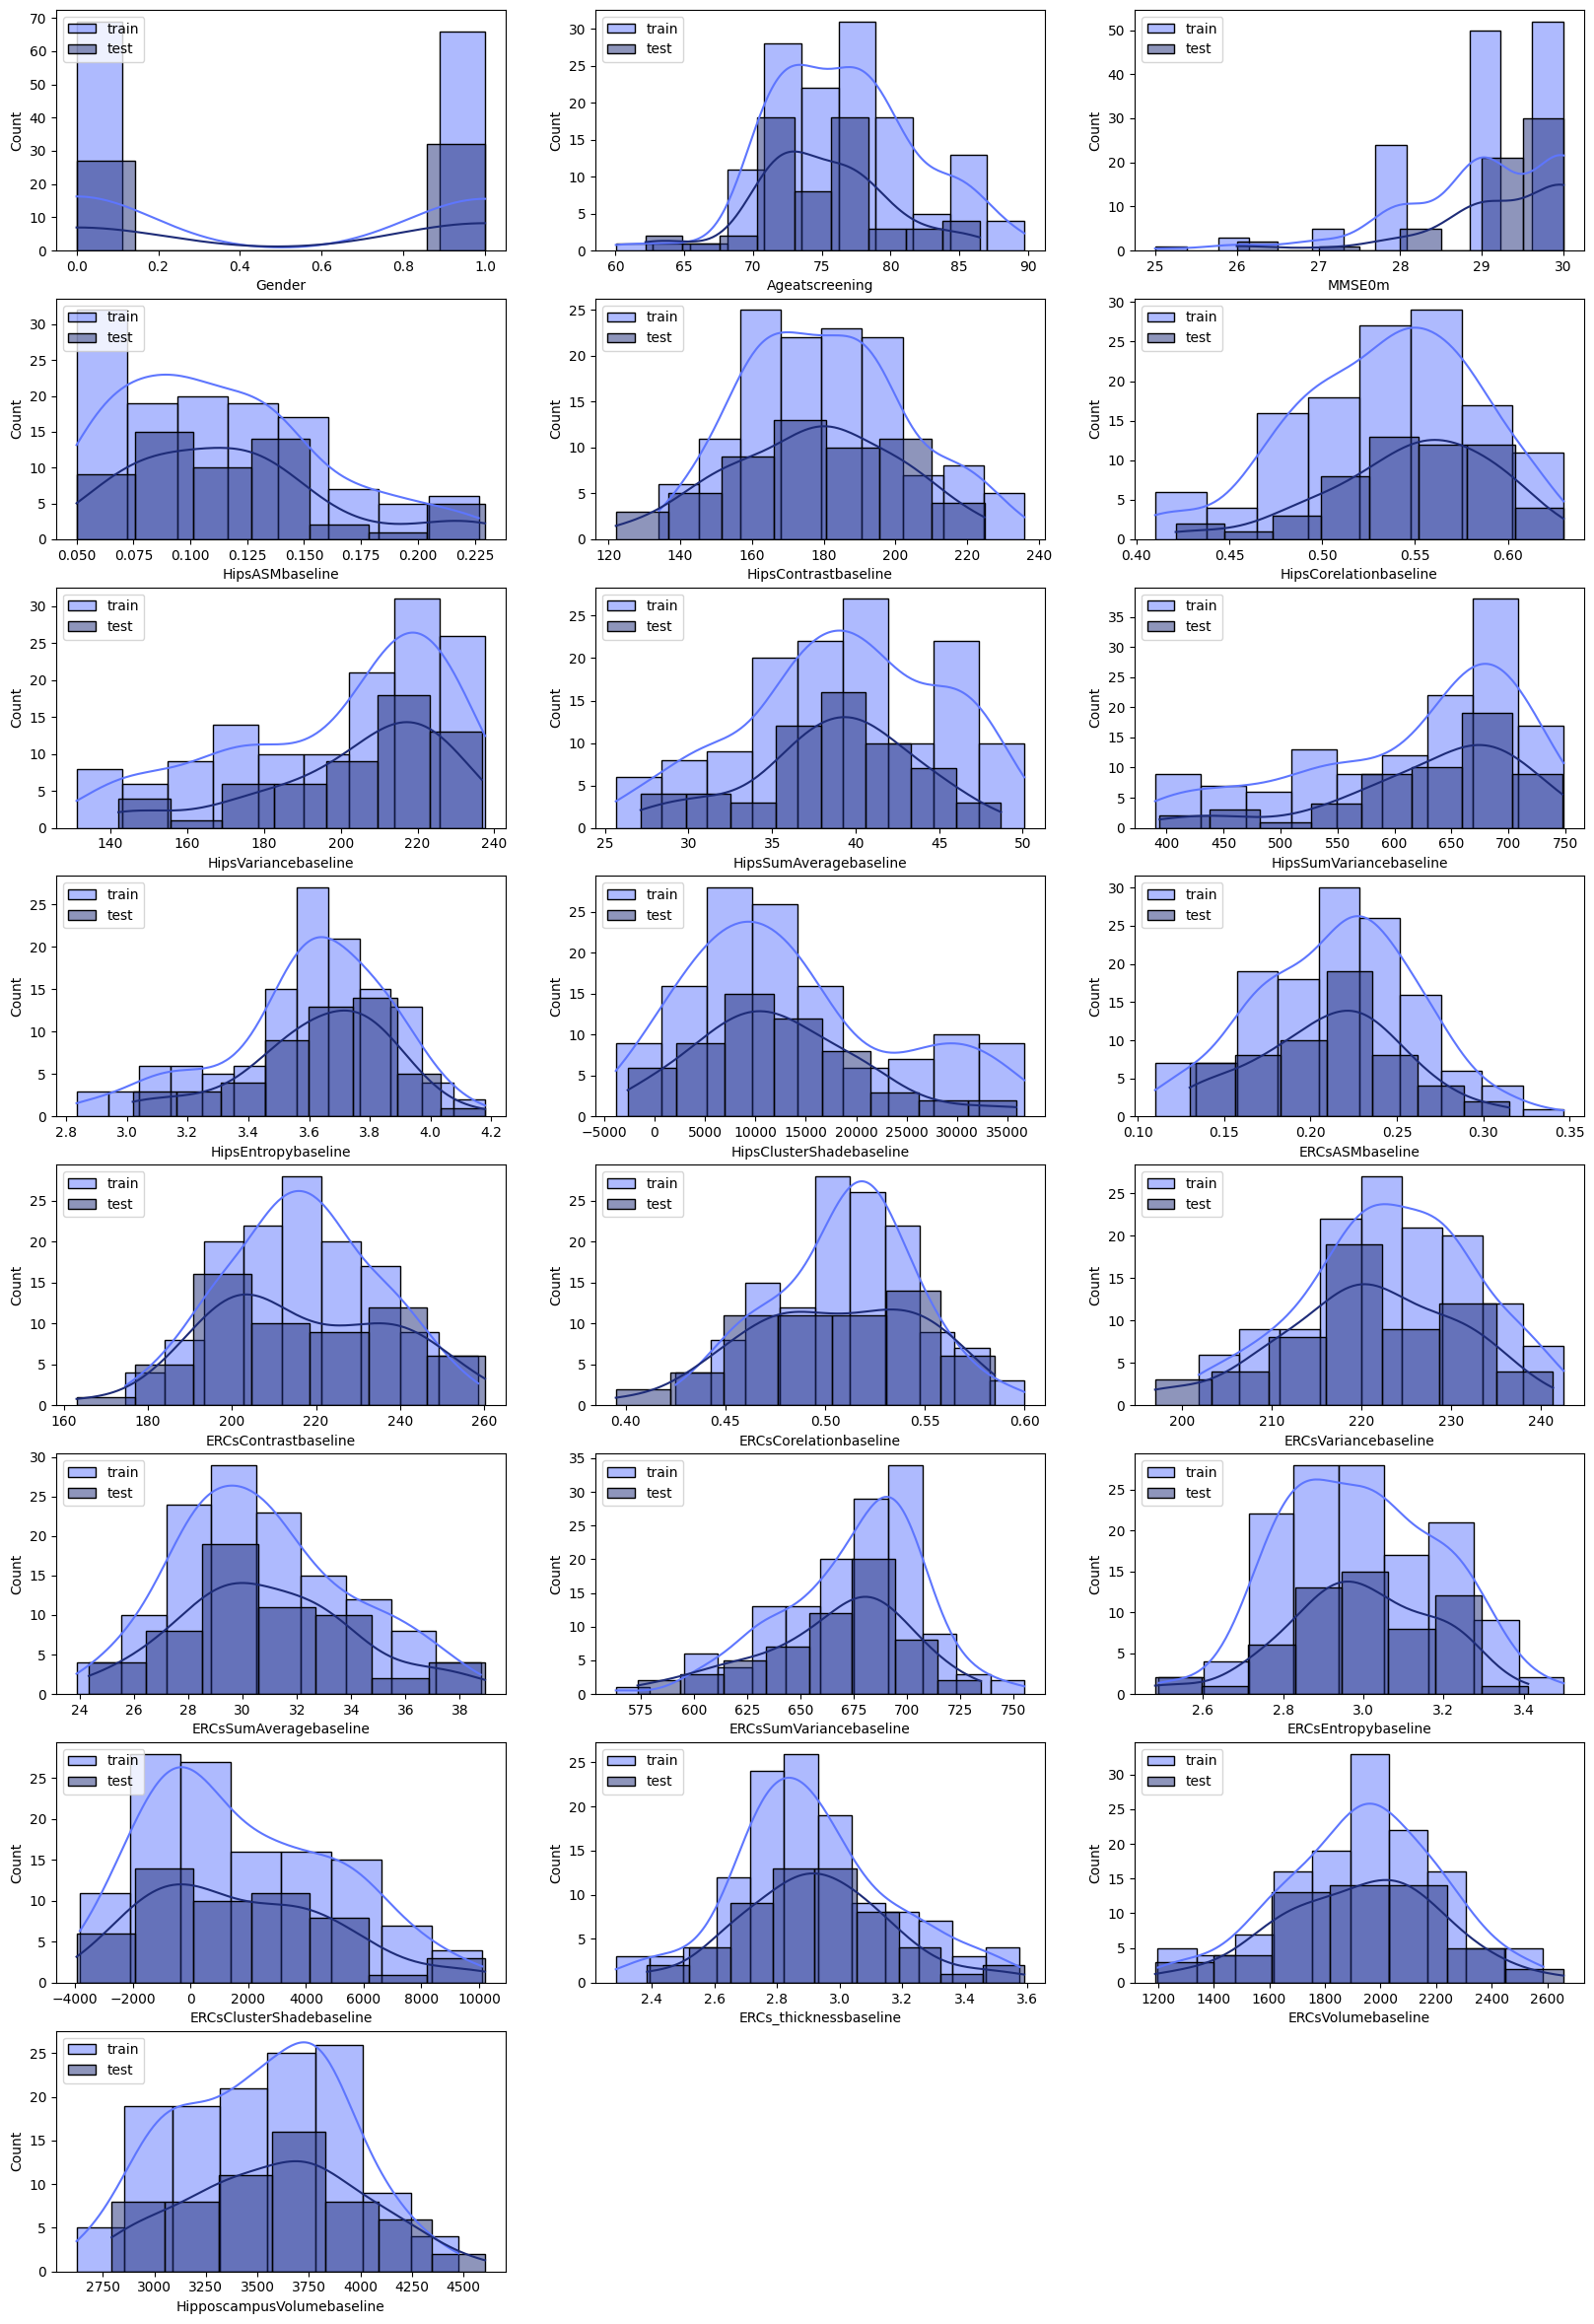

In [37]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))
for i in range(len(X_train_one.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_one[X_train_one.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_one[X_test_one.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [38]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(combined_group_two.drop(columns = ["Diagnosis"]),
                                                                    combined_group_two["Diagnosis"],
                                                                    test_size = .30, 
                                                                    random_state = 42,
)

X_train_two.shape, X_test_two.shape, y_train_two.shape, y_test_two.shape

((226, 22), (98, 22), (226,), (98,))

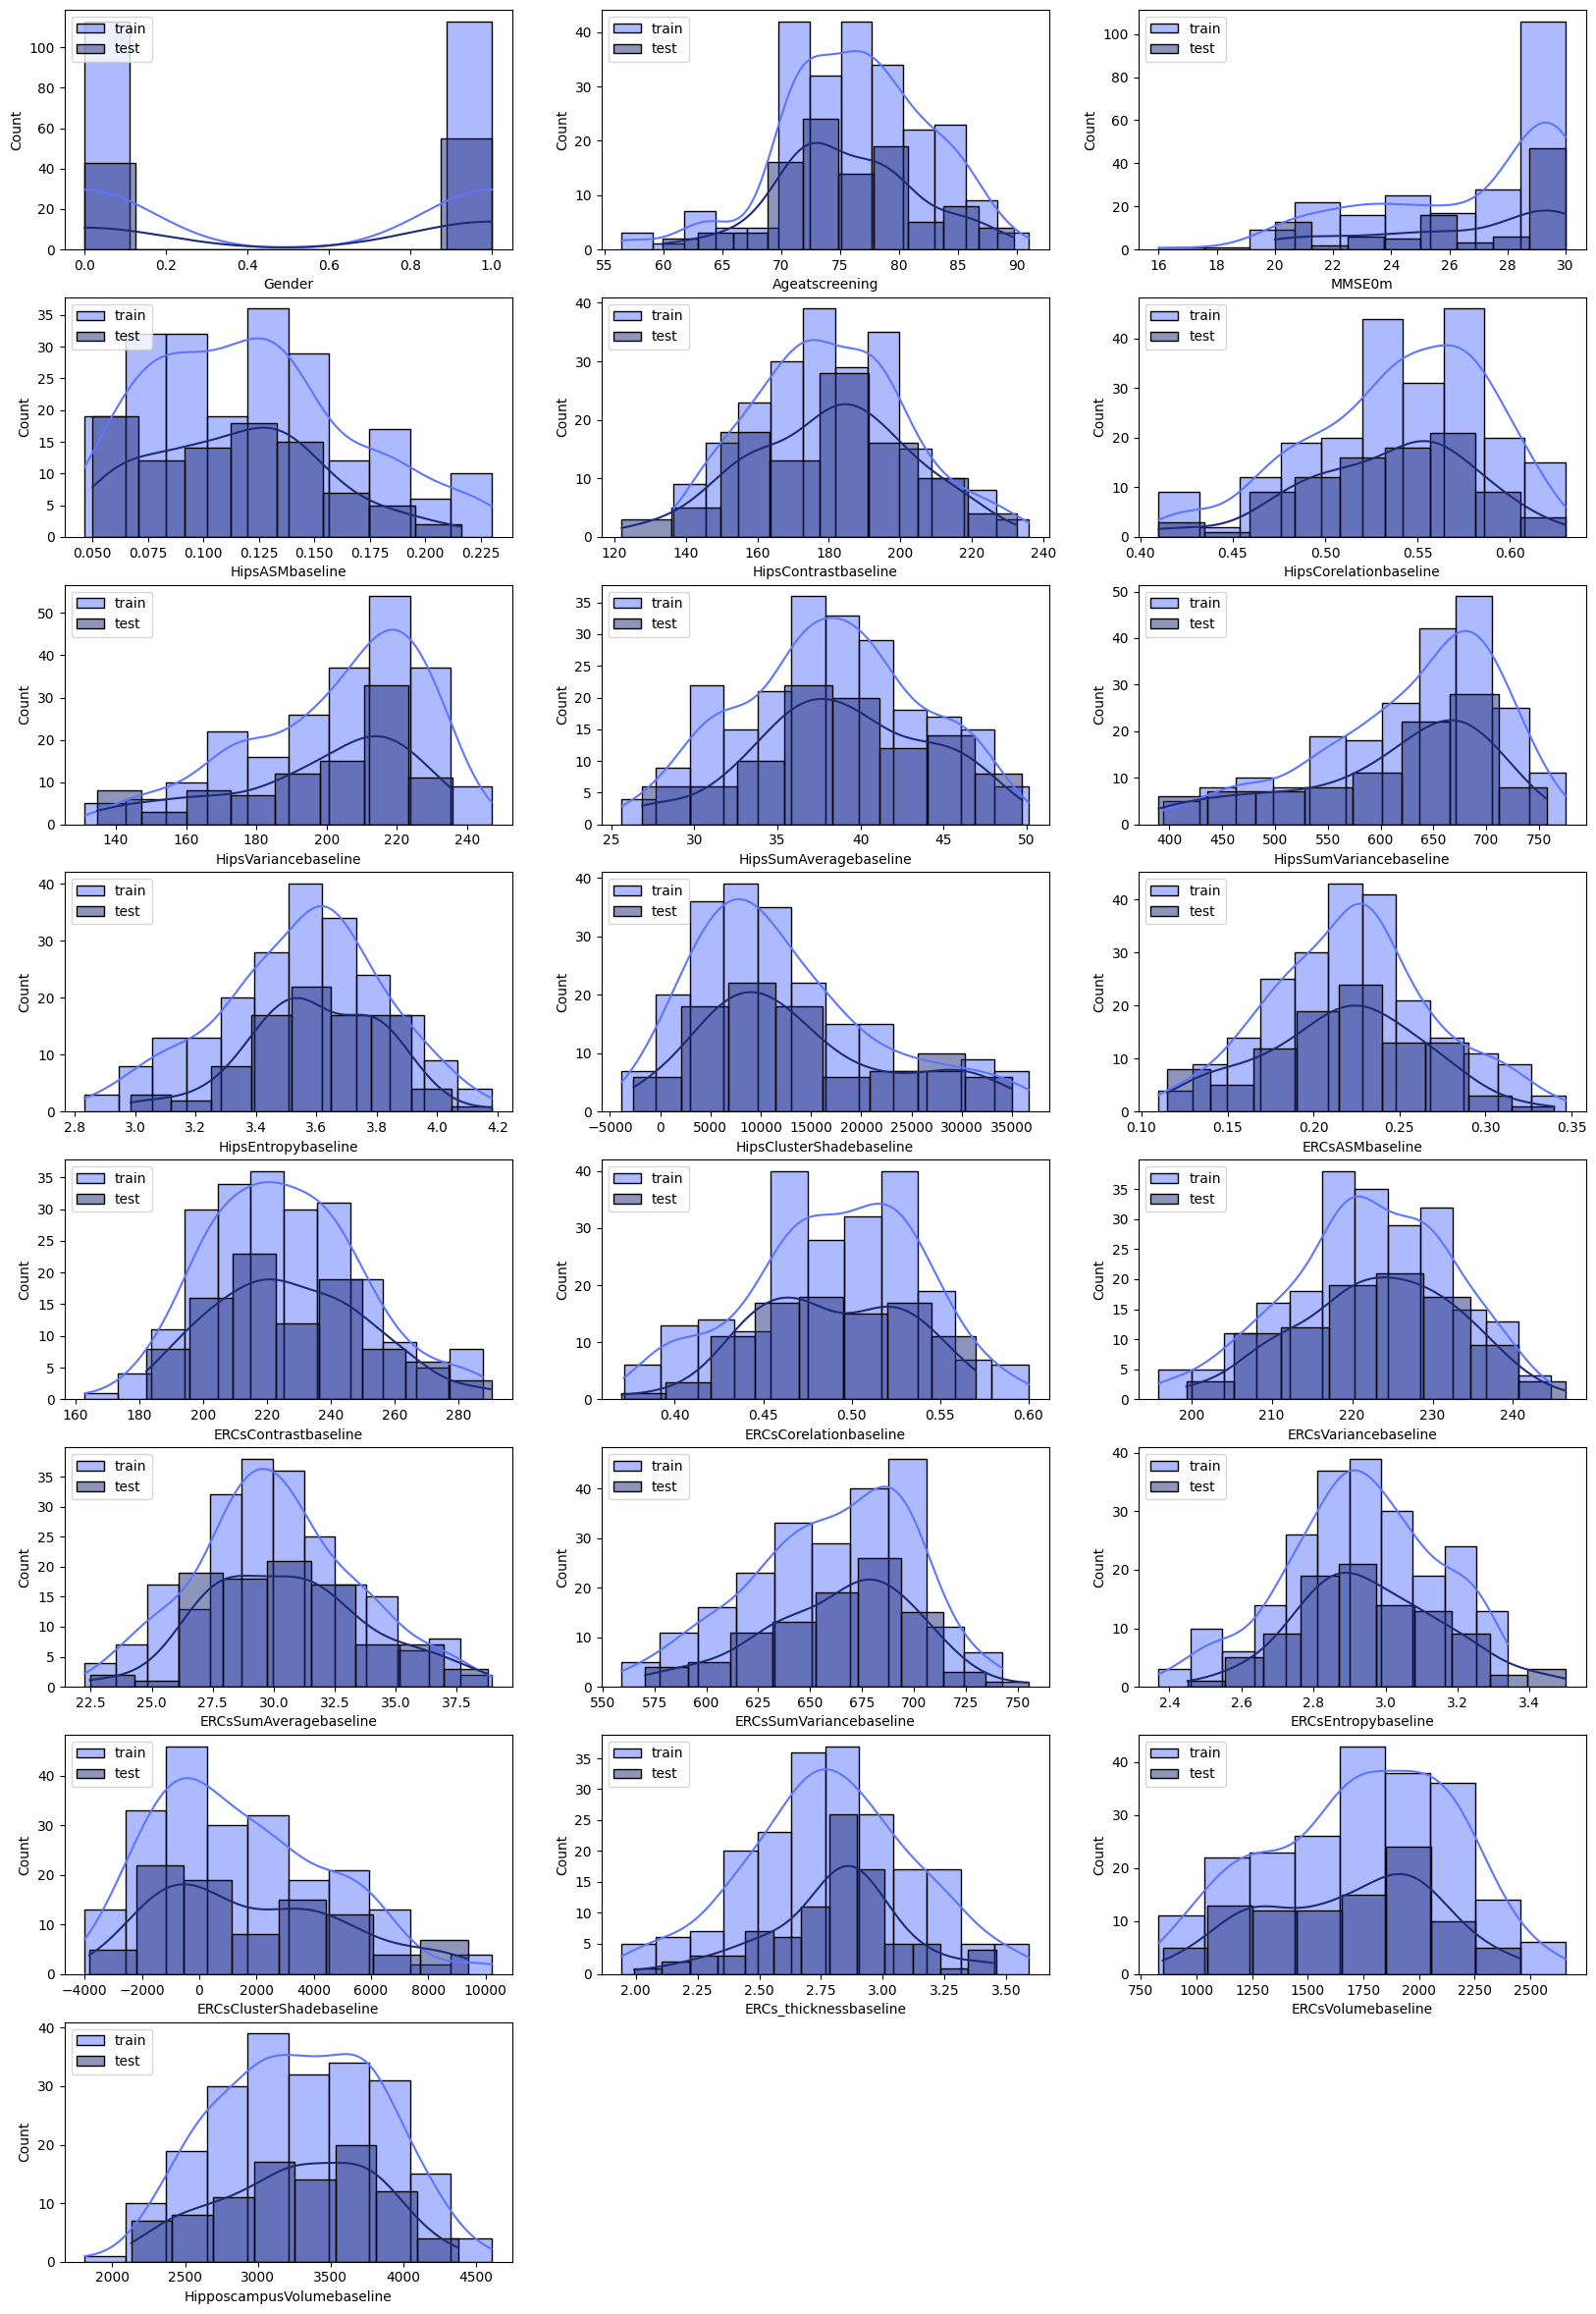

In [39]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_two.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_two[X_train_two.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_two[X_test_two.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [40]:
print("X_train Group one - 0 vs 3:")
print(X_train_one["Diagnosis"].value_counts())

print("\nX_test Group one - 0 vs 3:")
print(X_test_one["Diagnosis"].value_counts())

print("X_train Group two - 0 vs 2:")
print(X_train_two["Diagnosis"].value_counts())

print("\nX_test Group two - 0 vs 2:")
print(X_test_two["Diagnosis"].value_counts())

X_train Group one - 0 vs 3:


KeyError: 'Diagnosis'

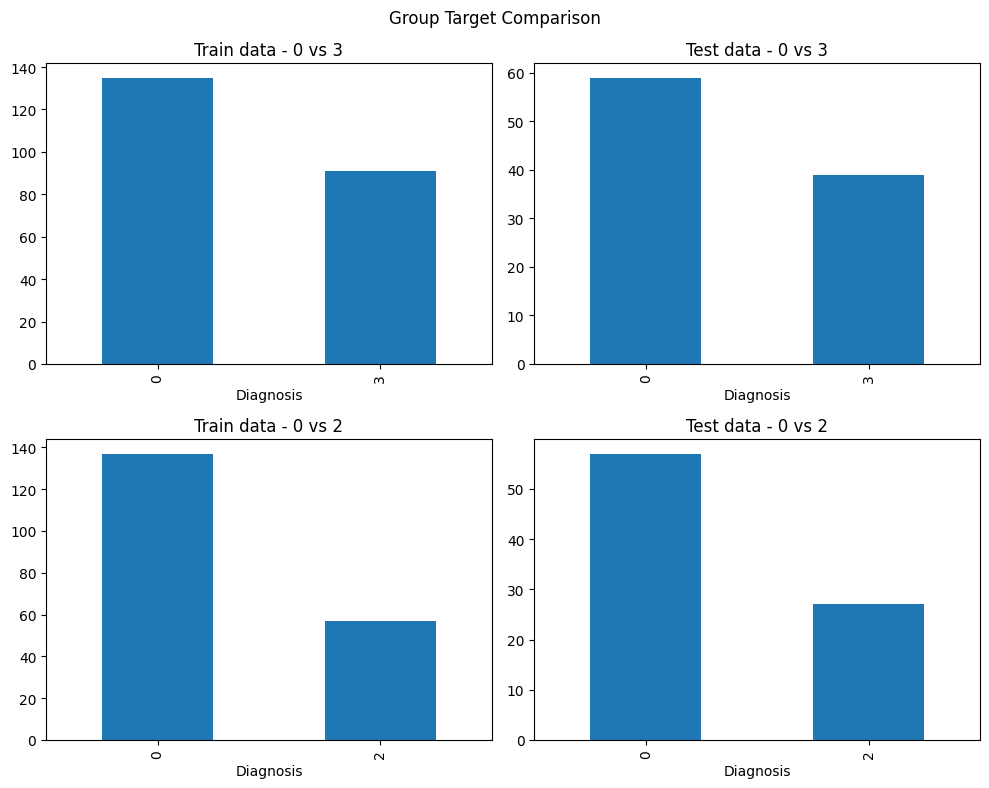

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle("Group Target Comparison")

plt.subplot(2, 2, 1)
X_train_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 3")

plt.subplot(2, 2, 2)
X_test_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 3")

plt.subplot(2, 2, 3)
X_train_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 2")

plt.subplot(2, 2, 4)
X_test_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 2")

plt.tight_layout()  
plt.show()